# Supervised Learning Project

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with
the bank (mortgage, securities account, etc.), and the customer response to the
last personal loan campaign (Personal Loan). Among these 5000 customers,
only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

### Domain:
Banking

### Context:
This case is about a bank (Thera Bank) whose management wants to explore
ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has
encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

### Objective:
The classification goal is to predict the likelihood of a liability customer buying
personal loans.

In [39]:
# Imported all neccessary library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [40]:
# Read the data as a 'Data' dataframe.
Data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [41]:
# Checking the first five data values from the dataset
Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:
* Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:
* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :
* ID
* Zip Code

In [42]:
# Checking the shape of the dataset
Data.shape

(5000, 14)

In [43]:
#This shows data type of each attribute and number of value present in each attribute.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [44]:
# Checking Missing value present in the dataset. No columns have null data in the file 
Data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [45]:
Data.describe() # this function is showing 5 point summery of data.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [46]:
# There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. clean the negative variable
dfExp = Data.loc[Data['Experience'] >0]
negExp = Data.Experience < 0
column_name = 'Experience'
mylist = Data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [47]:
# There are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [48]:
for id in mylist:
    age = Data.loc[np.where(Data['ID']==id)]["Age"].tolist()[0]
    education = Data.loc[np.where(Data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    Data.loc[Data.loc[np.where(Data['ID']==id)].index, 'Experience'] = exp

In [49]:
# checking if there are records with negative experience
Data[Data['Experience'] < 0]['Experience'].count()

0

In [50]:
Data.apply(lambda x : sum(x.isnull()))

ID                     0
Age                    0
Experience            29
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [51]:
# Filling 29 records with median
Data['Experience'].fillna((Data['Experience'].median()), inplace = True)

In [52]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.241800,11.326208,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [53]:
# Droped the ID and Zip Code columns becuase this has no effect on data.
Data.drop(["ID" , "ZIP Code"], axis = 1, inplace = True)

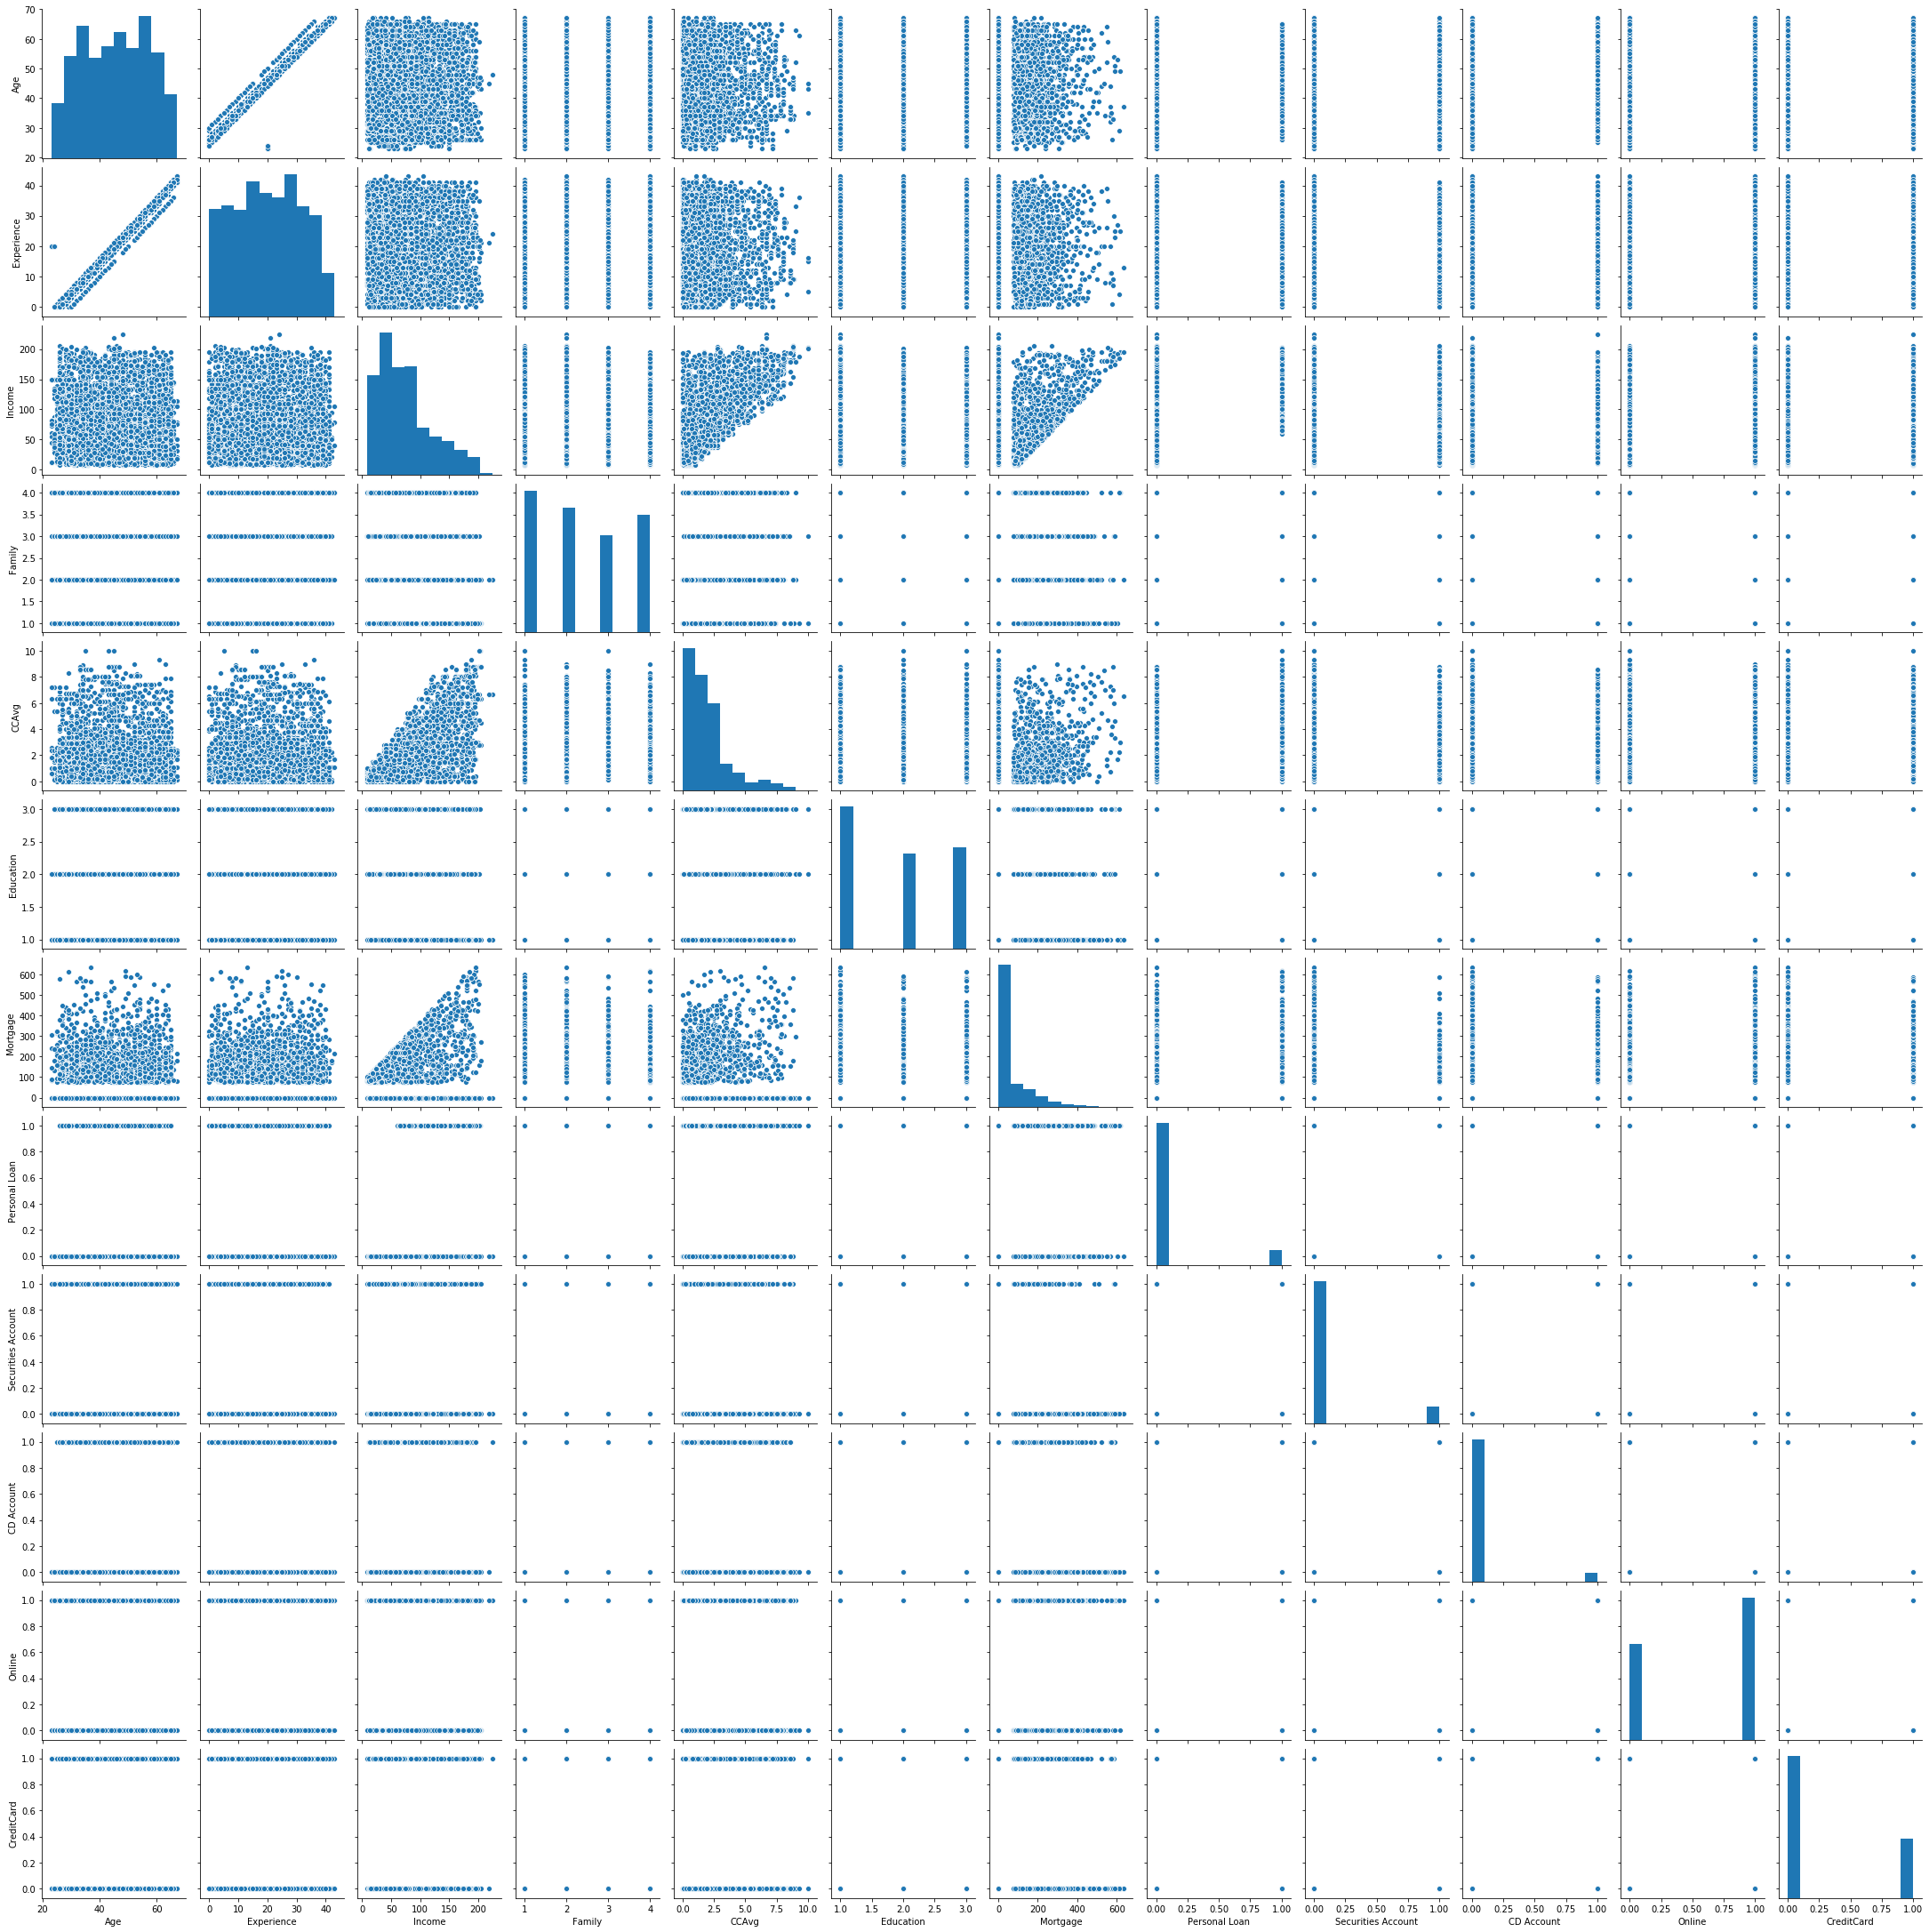

In [54]:
#This pairplot is showing co-relation between each and every attributes.
sns.pairplot(Data)

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the pairplot.
* Experience is normally distributed with more customer having experience starting from 8 years. 
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.
* Mortgage 70% of the individuals have a mortgage of less than 40K. However, the max value is 635K.
* The variables family and education are ordinal variables. The Family varible is evenly distributes.

In [55]:
#Checking the skewness attribute.
Data.skew()

Age                  -0.029341
Experience           -0.012853
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

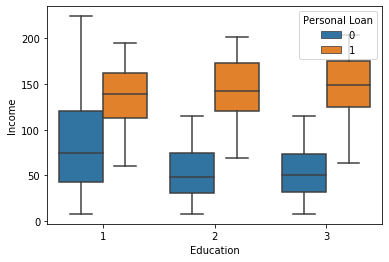

In [56]:
sns.boxplot(Data['Education'], Data['Income'], hue=Data['Personal Loan'])

* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

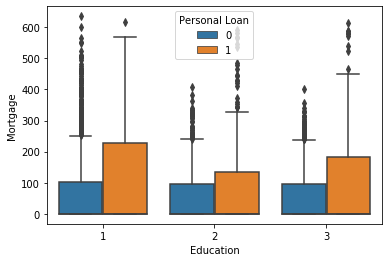

In [57]:
sns.boxplot(Data['Education'], Data['Mortgage'], hue=Data['Personal Loan'])

* From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

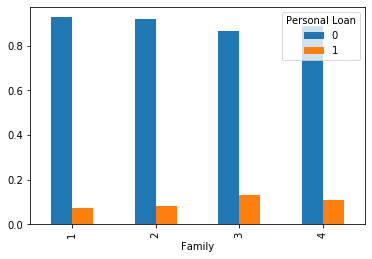

In [58]:
edu = pd.crosstab(Data['Family'], Data['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis = 0).plot(kind = 'bar')

* The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.

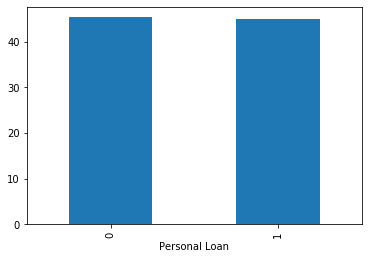

In [59]:
Data.groupby('Personal Loan')['Age'].mean().plot(kind= 'bar')

* We do not see much differance in Age and Personal loan

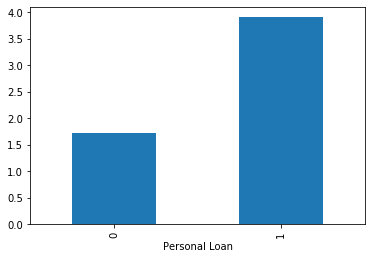

In [60]:
Data.groupby('Personal Loan')['CCAvg'].mean().plot(kind= 'bar')

* y-axis represents the mean applicant spending on credit cards per month ($000). It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

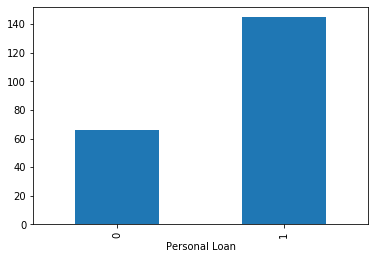

In [61]:
Data.groupby('Personal Loan')['Income'].mean().plot(kind= 'bar')

* From the above graph it is clearly shown that the person who has higher income is more likely to buy personal Loan.

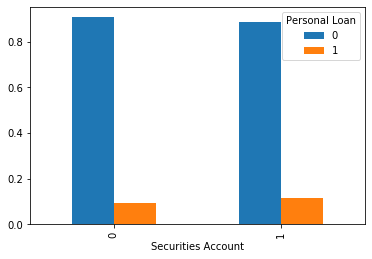

In [62]:
sec = pd.crosstab(Data['Securities Account'], Data['Personal Loan'])
sec.div(sec.sum(1).astype(float),axis = 0).plot(kind = 'bar')

* The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

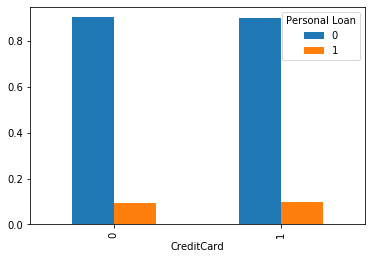

In [63]:
cred = pd.crosstab(Data['CreditCard'], Data['Personal Loan'])
cred.div(cred.sum(1).astype(float),axis = 0).plot(kind = 'bar')

* The customers who have or don’t have Credit Card with the bank do not affect the probability of buying a personal loan.

In [64]:
#Correlation coefficients are used to measure the strength of the relationship between two variables.
corr=Data.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.983890,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.983890,1.000000,-0.047978,-0.049342,-0.047502,0.013056,-0.012886,-0.011454,0.001027,0.007411,0.014453,0.007929
Income,-0.055269,-0.047978,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.049342,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.047502,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013056,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.012886,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.011454,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,0.001027,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.007411,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


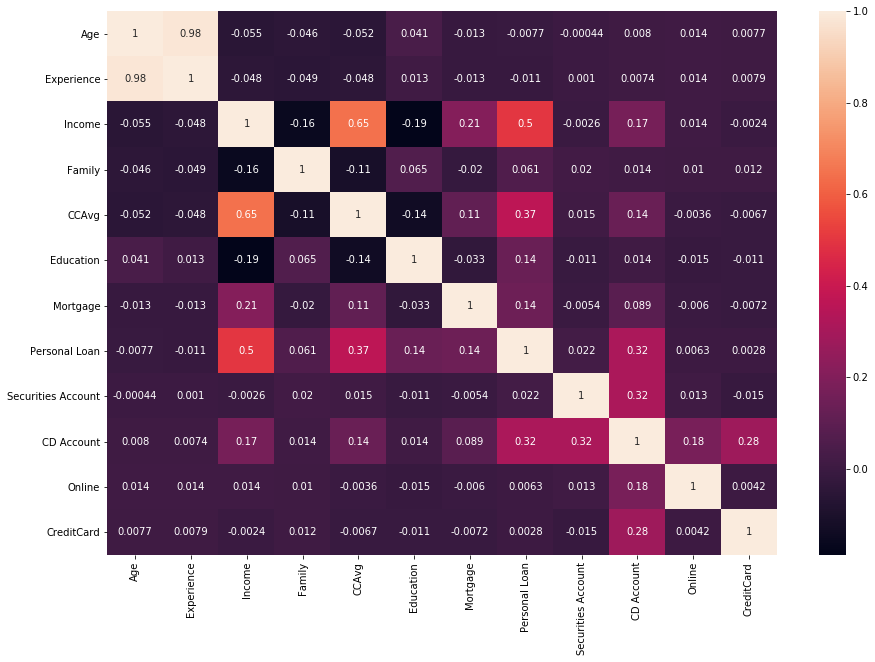

In [65]:
#Showing correlation between each variable
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

* Income and CCAvg is moderately correlated.
* Age and Experience is highly correlated

In [66]:
Data.info()

X = Data[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y = Data['Personal Loan']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


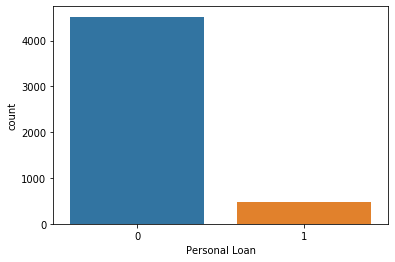

In [67]:
sns.countplot(y)

* From the above graph we can see the imbalanced of data. We need to balanced data to get accurate result. I am using swote analysis technique.

In [68]:
#importing Swote function to balancing the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_new,y_new = smote.fit_sample(X,y)

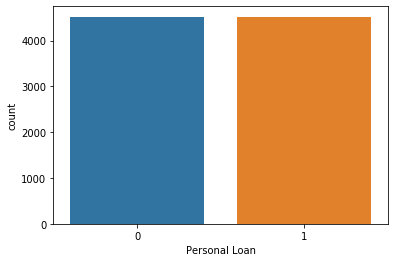

In [69]:
#After Swote Analysis Data is balanced
sns.countplot(y_new)

In [70]:
data = pd.DataFrame(X_new,columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])
data['Personal Loan'] = y_new

In [71]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1,0


In [72]:
# After using Swote analysis data size is changed
data.shape

(9040, 12)

In [73]:
#Changing the datatype of Family and Education attribute from int to Category.
data['Age'] = data['Age'].astype('int')
data['Experience'] = data['Experience'].astype('int')
data['Income'] = data['Income'].astype('float')
data['Securities Account'] = data['Securities Account'].astype('int')
data['CD Account'] = data['CD Account'].astype('int')
data['Online'] = data['Online'].astype('int')
data['Mortgage'] = data['Mortgage'].astype('int')
data['CreditCard'] = data['CreditCard'].astype('int')
data['Family'] = data['Family'].astype('int').astype("category")
data['Education'] = data['Education'].astype('int').astype("category")
data['Personal Loan'] = data['Personal Loan'].astype('int').astype("category")

In [74]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [75]:
#Creating dummy varible for categorical data
BankData = copy.deepcopy(data)
BankData = pd.get_dummies(BankData,drop_first=True)
BankData.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1
0,25,1,49.0,1.6,0,1,0,0,0,0,0,1,0,0,0
1,45,19,34.0,1.5,0,1,0,0,0,0,1,0,0,0,0
2,39,15,11.0,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100.0,2.7,0,0,0,0,0,0,0,0,1,0,0
4,35,8,45.0,1.0,0,0,0,0,1,0,0,1,1,0,0


In [76]:
# Splitting data into 'X' i.e Indepedant varible and y i.e Dependant variable.
X = BankData[BankData.columns[0:14]]
y = BankData[BankData.columns[14]]

#Splitting  the data into train and test dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 4)

### 1. Logistic Regression

In [77]:
#Imported All neccessay libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


# Applying Feature Scaling on dataset. Feature scaling improved the model performance.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Fitting Logistic Regression to the Training set
LogReg_Model = LogisticRegression()
LogReg_Model.fit(X_train,y_train)

# Predicting the Test set results
y_pred = LogReg_Model.predict(X_test)

#Printing Precision, Recall f1-score and support
print(classification_report(y_test,y_pred))

#Printing Confusion Matrix
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

#Printing Accuracy Score for model
print("\n Logistic Model Score:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1330
           1       0.91      0.90      0.91      1382

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712

Confusion Matrix: 
 [[1214  116]
 [ 140 1242]]

 Logistic Model Score: 0.9056047197640118


In [78]:
#Area Under the curve for Logistic Regression Model
LogReg_prob = LogReg_Model.predict_proba(X_test)
fpr,tpr,threshold =roc_curve(y_test,LogReg_prob[:,1])
roc_auc = auc(fpr,tpr)
print("Area under the ROC curve: %f" %roc_auc)

Area under the ROC curve: 0.966203


### 2. K Nearest Neighbors Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)


print(classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

print("\n KNN Model Score:",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1330
           1       0.95      0.95      0.95      1382

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712

Confusion Matrix: 
 [[1267   63]
 [  73 1309]]

 KNN Model Score: 0.9498525073746312


In [80]:
#Area under the curve for KNN Model
Knn_prob = knn_model.predict_proba(X_test)
fpr2,tpr2,threshold2 =roc_curve(y_test,Knn_prob[:,1])
roc_auc2 = auc(fpr2,tpr2)
print("Area under the ROC curve: %f" %roc_auc2)

Area under the ROC curve: 0.980611


### 3. Naive Bayes 

In [81]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)
y_pred = naive_model.predict(X_test)

print(classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

print("\n Naive Bayes Model Score:",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1330
           1       0.88      0.89      0.88      1382

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712

Confusion Matrix: 
 [[1164  166]
 [ 156 1226]]

 Naive Bayes Model Score: 0.8812684365781711


In [82]:
#Area under the curve for Naive Bayes Model
Naive_prob = naive_model.predict_proba(X_test)
fpr3,tpr3,threshold3 =roc_curve(y_test,Naive_prob[:,1])
roc_auc3 = auc(fpr3,tpr3)
print("Area under the ROC curve: %f" %roc_auc3)

Area under the ROC curve: 0.937461


### 4. Support Vector Machine

In [83]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

print("\n SVM Model Score:",accuracy_score(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1330
           1       0.95      0.93      0.94      1382

    accuracy                           0.94      2712
   macro avg       0.94      0.94      0.94      2712
weighted avg       0.94      0.94      0.94      2712

Confusion Matrix: 
 [[1265   65]
 [  92 1290]]

 SVM Model Score: 0.9421091445427728


### 5. Decision Tree Model

In [84]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)


print(classification_report(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

print("\n Decision Tree Model Score:",accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1330
           1       0.96      0.97      0.97      1382

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712

Confusion Matrix: 
 [[1279   51]
 [  35 1347]]

 Decision Tree Model Score: 0.9682890855457227


#### Conclusion: The goal of this problem is to predict the likelihood of a liability customer buying personal loans. 
  After performing Exploratory Data Analysis and Model Evaluation, it is clearly shows that Accuracy Score for models: 
 * Logistic Regression : 90%
 * K Nearest Neighbour : 95%
 * Naive Bayes         : 89%
 * Support Vector Machine :94%
 * Decision Tree          : 97%
 * All the algorithms performed very well. After evaluating the model score I choosed Decision Tree Model Becuase it is giving me higher accuracy score as compared to other models.
